In [14]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import pdb
import matplotlib.gridspec as gridspec
from pylab import *
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

In [15]:
znu = np.array([1009.7593   , 1004.12976  ,  997.94244  ,  987.29205  ,
        975.9316   ,  964.26685  ,  952.3993   ,  940.78534  ,
        929.12054  ,  917.5066   ,  906.39966  ,  895.7494   ,
        879.5708   ,  857.8643   ,  837.1722   ,  816.93634  ,
        796.70056  ,  776.46484  ,  756.73627  ,  737.5655   ,
        718.85126  ,  700.64417  ,  682.9442   ,  665.7514   ,
        648.5586   ,  631.36584  ,  614.73096  ,  598.806    ,
        583.13477  ,  567.71704  ,  552.55286  ,  537.64233  ,
        512.8421   ,  478.71008  ,  446.0996   ,  415.26413  ,
        386.45734  ,  359.17203  ,  333.15466  ,  308.8616   ,
        286.09003  ,  264.33276  ,  243.94487  ,  225.02774  ,
        207.27705  ,  190.49     ,  174.76799  ,  160.11101  ,
        146.36691  ,  133.58644  ,  121.566696 ,  110.459854 ,
         95.44786  ,   77.49433  ,   62.178047 ,   49.093273 ,
         37.986427 ,   28.502497 ,   20.641489 ,   14.149816 ,
          8.621753 ,    3.0429711])

In [16]:
dista = 'free'
mdir = '/Users/acasalla/Documents/PhD/Thesis/Idealized/'
dfT = pd.read_csv(mdir+'Data_to_plot/Distances_'+dista+'_TKE.csv')
df2 = pd.read_csv(mdir+'Data_to_plot/Distances_'+dista+'_2D.csv')
df = pd.read_csv(mdir+'Data_to_plot/Size_and_number_coresall.csv')
dfs = pd.concat([dfT,df2], axis = 1)

sta = 48
end = 5*24
jump = 24

runs = []
titles = []
mps = ['Tho','GCE']
subgs = ['T',''] 
subgt = ['-TKE-','-SM2-']

for i,subg in enumerate(subgs):
    for mp in mps:
        if mp == 'Tho' and subg == '':
            pbls = ['YSU','BL']
        else:
            pbls = ['YSU','BL']
        for pbl in pbls:
            runs.append(mp+subg+pbl)
            titles.append(mp+subgt[i]+pbl)

# Num and distances to variable for plotting

In [17]:
dist = []
numm = []

runs = ['ThoTYSU', 'ThoTBL', 'GCETYSU', 'GCETBL', 'ThoYSU', 'ThoBL', 'GCEYSU', 'GCEBL']
for i,run in enumerate(runs):
    #### Core number
    numm.append(df['CN_'+run][48:end].mean())
    #### dclr
    dist.append(dfs[run][48:end].mean()*2)

# Cloud water to variable for plotting

In [18]:
runs = ['ThoTYSU', 'ThoTBL', 'GCETYSU', 'GCETBL', 'ThoYSU', 'ThoBL', 'GCEYSU', 'GCEBL']
qcl = np.array([])
for i,run in enumerate(runs):
    ds = xr.open_dataset(mdir+'clouds/'+run+'_ql_cl_frac.nc')
    qcl = np.append(qcl, (ds.QICE[sta:end,0:22,0,0].mean(dim='XTIME').max()*100).values)

# QVAPOR to variable for plotting

In [96]:
qvs = xr.open_dataset(f'{mdir}Data_to_plot/qvapor_height.nc')

In [71]:
dry_anom = []
for i,run in enumerate(runs):
    dry_anom.append(float((qvs[f'{run}'][:,0:22]).mean().values))

# Temp to variable for plotting

In [140]:
temps = xr.open_dataset(f'{mdir}Data_to_plot/temp_height.nc')

In [155]:
temp_anom = []
for i,run in enumerate(runs):
    temp_anom.append(float((temps[f'{run}'][:,0:22]).mean().values))

# Plotting

Text(0.0, 1.0, '(b)')

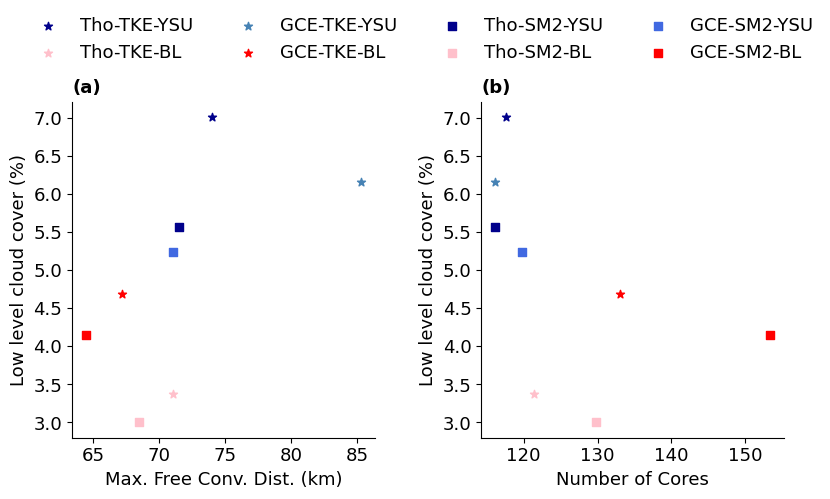

In [19]:
fig = plt.figure(figsize=(8,4))
gs = GridSpec(1,2,left = 0.09, right = 0.98, hspace=0.05, wspace=0.35, top = 0.92, bottom = 0.08, )
marker = ['*']*4 + ['s']*4
color = ['darkblue','pink','steelblue','red','darkblue','pink','royalblue','red']
ax = plt.subplot(gs[0])
for i,run in enumerate(runs):
    plt.scatter(dist[i], qcl[i], label = titles[i], color = color[i], marker = marker[i])
#plt.yscale('log')
plt.legend(frameon=False, ncol=4, bbox_to_anchor = (2.5,1.3), fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Max. Free Conv. Dist. (km)', fontsize=13)
plt.ylabel('Low level cloud cover (%)', fontsize=13)
plt.title('(a)', loc = 'left', fontweight = 'bold', fontsize=13)

ax = plt.subplot(gs[1])
for i,run in enumerate(runs):
    plt.scatter(numm[i], qcl[i], label = titles[i], color = color[i], marker = marker[i])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Number of Cores', fontsize=13)
plt.ylabel('Low level cloud cover (%)', fontsize=13)
plt.title('(b)', loc = 'left', fontweight = 'bold', fontsize=13)

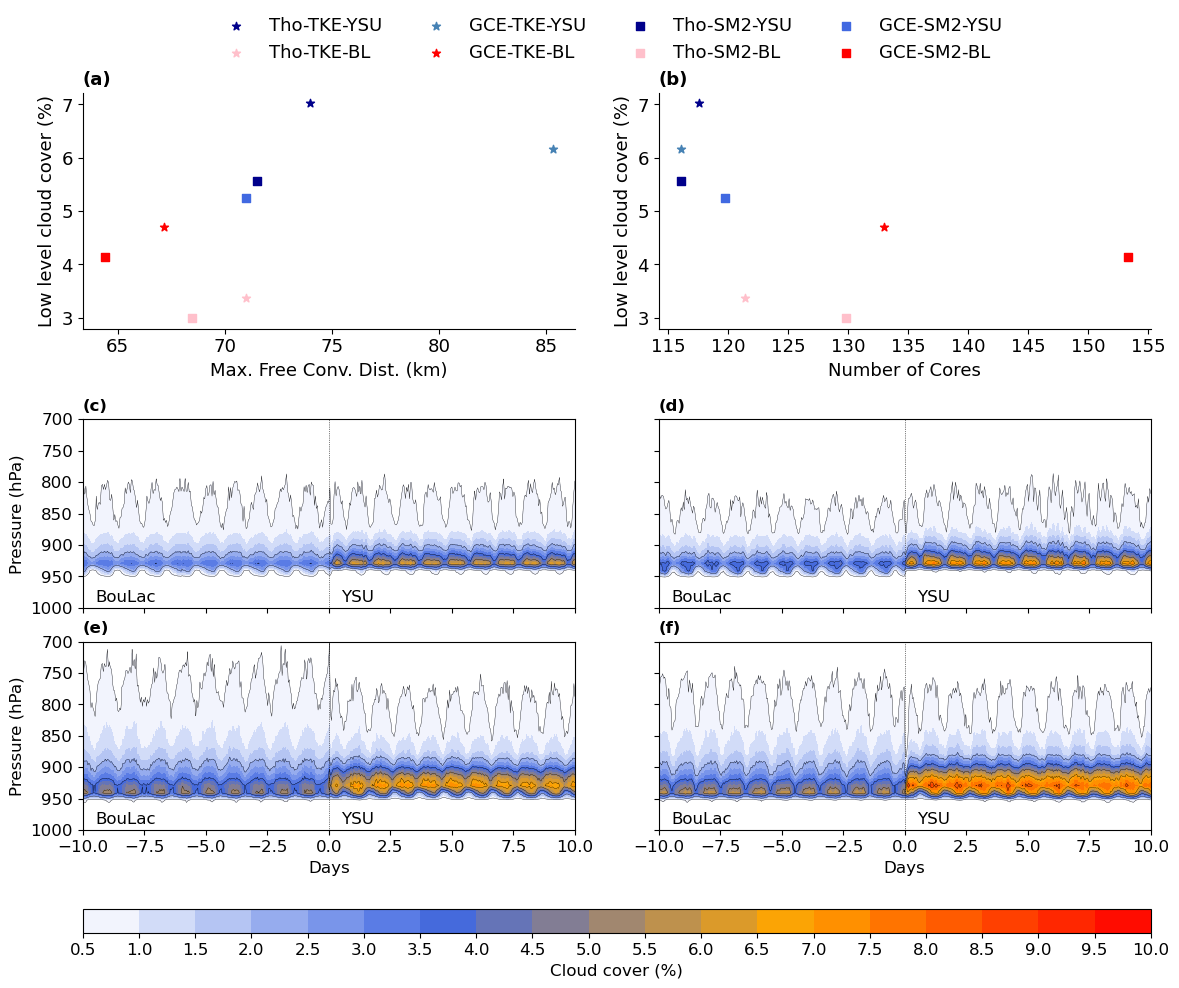

In [12]:
runs = ['ThoTYSU', 'ThoTBL', 'GCETYSU', 'GCETBL', 'ThoYSU', 'ThoBL', 'GCEYSU', 'GCEBL']
cmap=LinearSegmentedColormap.from_list('', ['white','royalblue','orange','red'])

fig = plt.figure(figsize=(12,10))
gs = GridSpec(6,2,left = 0.09, right = 0.98, hspace=0.3, wspace=0.17, top = 0.92, bottom = 0.08, 
              height_ratios = [1,0.1,0.8,0.8,0.05,0.1])
marker = ['*']*4 + ['s']*4
color = ['darkblue','pink','steelblue','red','darkblue','pink','royalblue','red']
ax = plt.subplot(gs[0])
for i,run in enumerate(runs):
    plt.scatter(dist[i], qcl[i], label = titles[i], color = color[i], marker = marker[i])
#plt.yscale('log')
plt.legend(frameon=False, ncol=4, bbox_to_anchor = (1.9,1.39), fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Max. Free Conv. Dist. (km)', fontsize=13)
plt.ylabel('Low level cloud cover (%)', fontsize=13)
plt.title('(a)', loc = 'left', fontweight = 'bold', fontsize=13)

ax = plt.subplot(gs[1])
for i,run in enumerate(runs):
    plt.scatter(numm[i], qcl[i], label = titles[i], color = color[i], marker = marker[i])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Number of Cores', fontsize=13)
plt.ylabel('Low level cloud cover (%)', fontsize=13)
plt.title('(b)', loc = 'left', fontweight = 'bold', fontsize=13)

runs = ['Tho','ThoT','GCE','GCET']
#levels = [0.005,0.01,0.015,0.02,0.04,0.08,0.12,0.16,0.2,0.24,0.28,0.32]
levels = np.arange(0.005,0.101,0.005)*100
levs = np.arange(0.005,0.101,0.015)*100
title = ['(c)','(d)','(e)','(f)']
for i,run in enumerate(runs):
    ds_bl = xr.open_dataset('clouds/'+run+'BL_ql_cl_frac.nc')
    ds_ybl = xr.open_dataset('clouds/'+run+'BLY_ql_cl_frac.nc')
    bl = ds_bl.QICE[-10*24:,:,0,0]
    ysu = ds_ybl.QICE[-10*24:,:,0,0]
    data = []
    data.append(bl)
    data.append(ysu)
    ds = xr.concat(data, dim = 'XTIME')
    ax = plt.subplot(gs[i+4])
    im = plt.contourf(np.linspace(-10,10,len(ds)),znu,ds.T*100, 
                      cmap = cmap, levels = levels)
    plt.contour(np.linspace(-10,10,len(ds)),znu,ds.T*100, levels = levs, linewidths = 0.25, colors ='k')
    plt.ylim(1000,700)
    plt.axvline(0,linestyle = ':', color = 'k', linewidth = 0.5)
    plt.text(-9.5,990,'BouLac', fontsize = 12)
    plt.text(0.5,990,'YSU', fontsize = 12)
    plt.title(title[i], loc = 'left', fontsize =12, fontweight = 'bold')
    plt.xticks(fontsize =12)
    plt.yticks(fontsize =12)
    if i == 0 or i == 2:
        plt.ylabel('Pressure (hPa)', fontsize =12)
    else:
        ax.yaxis.set_major_formatter(NullFormatter())
    if i > 1:
        plt.xlabel('Days', fontsize =12)
    else:
        ax.xaxis.set_major_formatter(NullFormatter())

cax = plt.subplot(gs[5,:])
cbar = plt.colorbar(im, cax=cax, orientation = 'horizontal', ticks = levels)
cbar.set_label('Cloud cover (%)', fontsize =12)
cbar.ax.tick_params(labelsize=12)
plt.savefig('/Users/acasalla/Documents/PhD/Thesis/Plots/PBL_numm_dist_low_level_cloud.jpg',
            bbox_inches = 'tight', dpi = 300)
plt.savefig('/Users/acasalla/Documents/PhD/Thesis/Plots/PBL_numm_dist_low_level_cloud.pdf',
            bbox_inches = 'tight', dpi = 300)

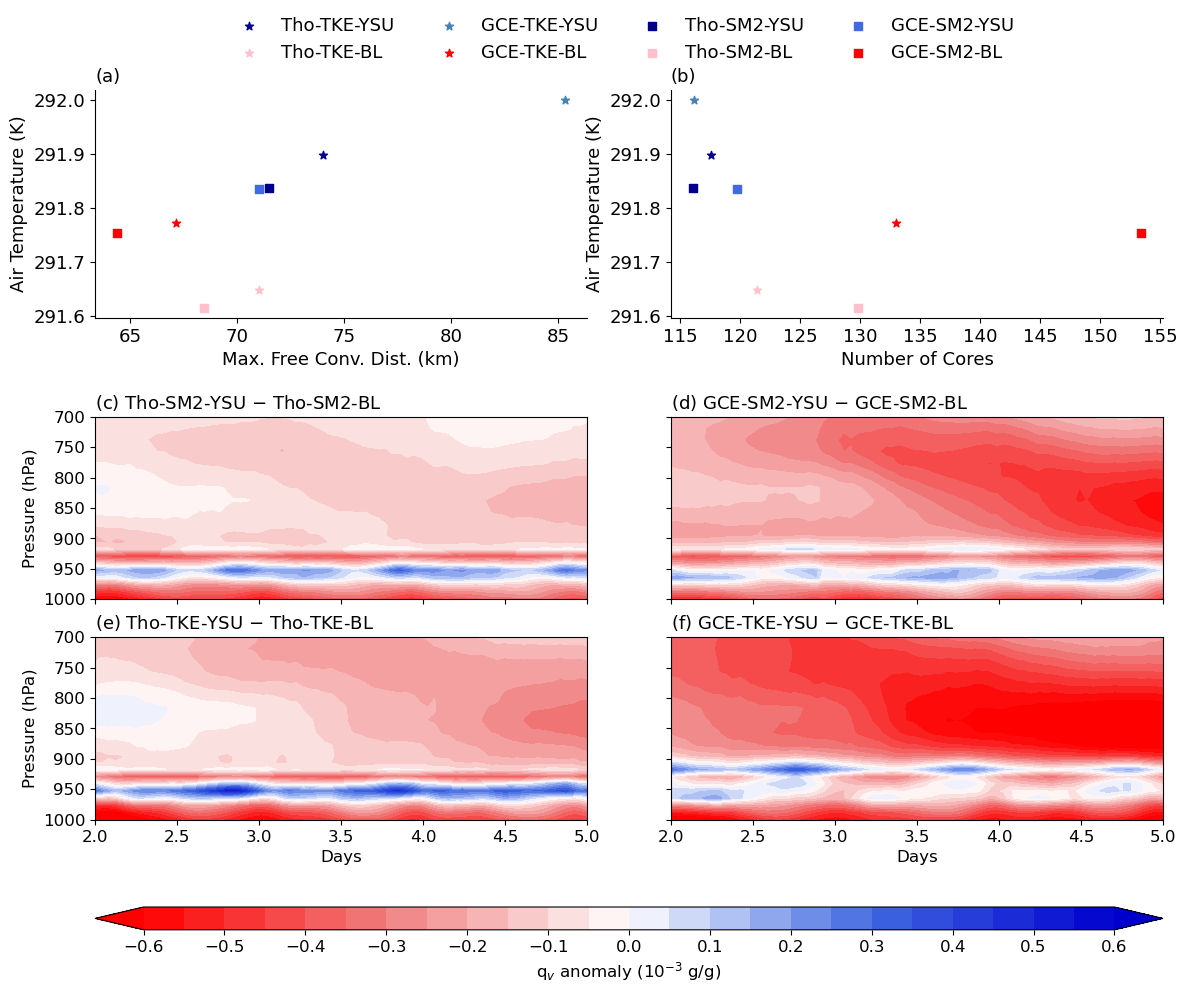

In [161]:
runs = ['ThoTYSU', 'ThoTBL', 'GCETYSU', 'GCETBL', 'ThoYSU', 'ThoBL', 'GCEYSU', 'GCEBL']
cmap=LinearSegmentedColormap.from_list('', ['red','lightcoral','white','royalblue','mediumblue'])
#cmap = 'BrBG'

fig = plt.figure(figsize=(12,10))
gs = GridSpec(6,2,left = 0.09, right = 0.98, hspace=0.35, wspace=0.17, top = 0.92, bottom = 0.08, 
              height_ratios = [1,0.1,0.8,0.8,0.05,0.1])
marker = ['*']*4 + ['s']*4
color = ['darkblue','pink','steelblue','red','darkblue','pink','royalblue','red']
ax = plt.subplot(gs[0])
for i,run in enumerate(runs):
    plt.scatter(dist[i], temp_anom[i], label = titles[i], color = color[i], marker = marker[i])
#plt.yscale('log')
plt.legend(frameon=False, ncol=4, bbox_to_anchor = (1.9,1.39), fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Max. Free Conv. Dist. (km)', fontsize=13)
plt.ylabel('Air Temperature (K)', fontsize=13)
plt.title('(a)', loc = 'left', fontsize=13)

ax = plt.subplot(gs[1])
for i,run in enumerate(runs):
    plt.scatter(numm[i], temp_anom[i], label = titles[i], color = color[i], marker = marker[i])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Number of Cores', fontsize=13)
plt.ylabel('Air Temperature (K)', fontsize=13)
plt.title('(b)', loc = 'left', fontsize=13)

title = ['(c) Tho-SM2-YSU $\minus$ Tho-SM2-BL','(d) GCE-SM2-YSU $\minus$ GCE-SM2-BL',
         '(e) Tho-TKE-YSU $\minus$ Tho-TKE-BL','(f) GCE-TKE-YSU $\minus$ GCE-TKE-BL']
ticks = np.arange(-0.6,0.601,0.1)
for i,run in enumerate(runis):
    ax = plt.subplot(gs[i+4])
    im = plt.contourf(np.linspace(2,5,72), znu[0:22],(qvs_anom[run].T)*1000, levels = np.arange(-0.6,0.601,0.05), 
                      extend = 'both', cmap = cmap)
    plt.ylim(1000,700)
    plt.xticks(np.arange(2,5.01,0.5), fontsize = 12)
    plt.title(title[i], loc = 'left', fontsize = 13)
    plt.yticks(fontsize = 12)
    if i == 0 or i == 2:
        plt.ylabel('Pressure (hPa)', fontsize =12)
    else:
        ax.yaxis.set_major_formatter(NullFormatter())
    if i > 1:
        plt.xlabel('Days', fontsize =12)
    else:
        ax.xaxis.set_major_formatter(NullFormatter())
    
cax = plt.subplot(gs[5,:])
cbar = plt.colorbar(im, cax=cax, orientation = 'horizontal', ticks = ticks)
cbar.set_label('q$_{v}$ anomaly (10$^{-3}$ g/g)', fontsize =12)
cbar.ax.tick_params(labelsize=12)
plt.savefig('/Users/acasalla/Documents/PhD/Thesis/Plots/PBL_numm_dist_temp_qv.jpg',
            bbox_inches = 'tight', dpi = 300)
plt.savefig('/Users/acasalla/Documents/PhD/Thesis/Plots/PBL_numm_dist_temp_qv.pdf',
            bbox_inches = 'tight', dpi = 300)

# Convective Mass Flux

In [193]:
cloud = xr.open_dataset(f'{mdir}Data_to_plot/Cloud_mass_48-120.nc')

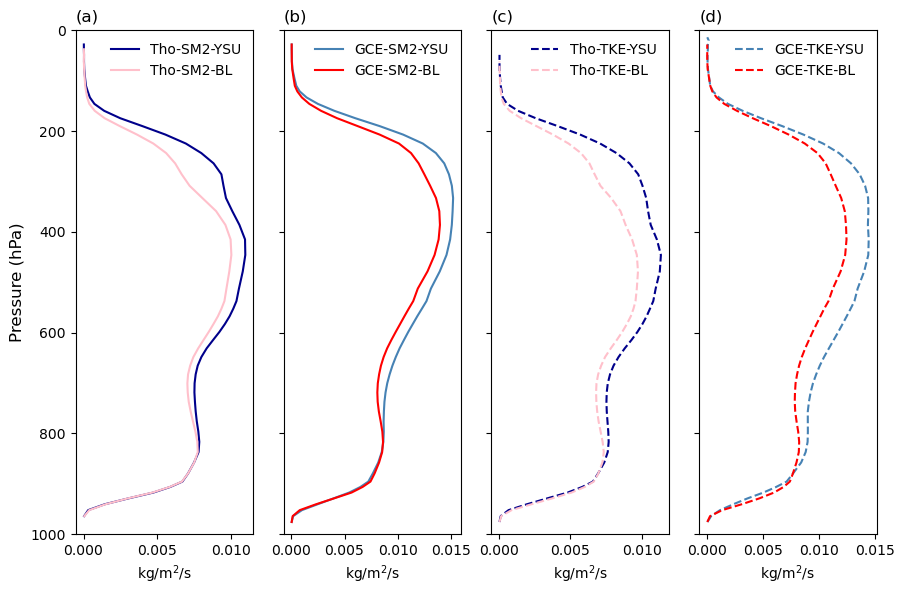

In [226]:
fig = plt.figure(figsize=(9,6))
gs = GridSpec(1,4,left = 0.09, right = 0.98, hspace=0.35, wspace=0.17, top = 0.92, bottom = 0.08)
color1 = ['darkblue','steelblue','darkblue','steelblue']
color2 = ['pink','red','pink','red']
title1 = ['Tho-SM2-YSU','GCE-SM2-YSU','Tho-TKE-YSU','GCE-TKE-YSU']
title2 = ['Tho-SM2-BL','GCE-SM2-BL','Tho-TKE-BL','GCE-TKE-BL']
linestyle = ['-','-','--','--']
titulo = ['(a)','(b)','(c)','(d)']

for i,run in enumerate(runis):
    ax = plt.subplot(gs[i])
    tmp_ysu = cloud[f'{run}YSU_conv'].mean(dim='time')
    tmp_bl = cloud[f'{run}BL_conv'].mean(dim='time')
    plt.plot(tmp_ysu,znu, label = title1[i], color = color1[i], linestyle = linestyle[i])
    plt.plot(tmp_bl,znu, label = title2[i], color = color2[i], linestyle = linestyle[i])
    plt.ylim(1000,0)
    plt.legend(frameon = False)
    plt.title(titulo[i], loc = 'left')
    if i == 0:
        plt.ylabel('Pressure (hPa)', fontsize =12)
    else:
        ax.yaxis.set_major_formatter(NullFormatter())
    plt.xlabel('kg/m$^2$/s')
plt.savefig('/Users/acasalla/Documents/PhD/Thesis/Plots/Mass_flux.jpg', bbox_inches = 'tight', dpi = 300)
plt.savefig('/Users/acasalla/Documents/PhD/Thesis/Plots/Mass_flux.pdf', bbox_inches = 'tight', dpi = 300)